In [1]:
from glob import glob
import json
import av
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import nltk
import cv2

class DatabaseStats:
    def __init__(self, DATASET_DIR='..', database=None):
        self.DATASET_DIR = DATASET_DIR
        self.database = database

        self.uttids_path = {DS: glob(os.path.join(self.DATASET_DIR, self.database, f'faces/{DS}/*.pkl')) for DS in ['train', 'val', 'test']}
        self.uttids_path = {DS: [os.path.basename(path).split('.pkl')[0] for path in paths] for DS, paths in self.uttids_path.items()}
                    
        self.fps_all = {}
        self.frames_all = {}
        self.tokens_all = {}
        
        for DS in tqdm(['train', 'val', 'test']):
            self.fps_all[DS] = []
            self.frames_all[DS] = []
            self.tokens_all[DS] = []
            
            for uttid in tqdm(self.uttids_path[DS]):
                self.get_paths(DS, uttid)
                
                if self.vid_path is not None:
                    try:
                        container = av.open(self.vid_path)
                        # I know the below line is a very dirty code but this is the most accurate way.
                        num_frames = sum(1 for _ in container.decode(video=0))
                        fps = round(float(container.streams.video[0].average_rate))
                        container.close()
                        self.fps_all[DS].append(fps)
                        self.frames_all[DS].append(num_frames)
                    except:
                        pass
                    
                if self.text_path is not None:
                    with open(self.text_path, 'r') as stream:
                        text = json.load(stream)['Utterance']
                    tokens = nltk.word_tokenize(text)
                    self.tokens_all[DS].append(len(tokens))
    
    def get_paths(self, DS, uttid):
        self.vid_path = os.path.join(self.DATASET_DIR, self.database, 'raw-videos', DS, uttid +'.avi')
        if not os.path.isfile(self.vid_path):
            self.vid_path = self.vid_path.replace('.avi', '.mp4')
        if not os.path.isfile(self.vid_path):
            self.vid_path = None
            
        self.audio_path = os.path.join(self.DATASET_DIR, self.database, 'raw-audios', DS, uttid + '.wav')
        if not os.path.isfile(self.audio_path):
            self.audio_path = self.audio_path.replace('.wav', '.mp3')
        if not os.path.isfile(self.audio_path):
            self.audio_path = None

        self.text_path = os.path.join(self.DATASET_DIR, self.database, 'raw-texts', DS, uttid + '.json')
        if not os.path.isfile(self.text_path):
            self.text_path = None
            
            
def fps_hist(dbs):
    fig, axes = plt.subplots(1, 3, figsize=(15,5));
    fig.suptitle('fps')

    for DS, ax in zip(['train', 'val', 'test'], axes):
        ax.hist(dbs.fps_all[DS], bins=10)
        ax.set_xlabel(DS)
        
def frames_hist(dbs):
    fig, axes = plt.subplots(1, 3, figsize=(15,5));
    fig.suptitle('number of frames')

    for DS, ax in zip(['train', 'val', 'test'], axes):
        ax.hist(dbs.frames_all[DS], bins=100)
        title_string = f"mean: {np.mean(dbs.frames_all[DS]).astype(np.int)}, "  \
                       f"std: {np.std(dbs.frames_all[DS]).astype(np.int)}, "\
                       f"min: {np.min(dbs.frames_all[DS]).astype(np.int)}, "\
                       f"max: {np.max(dbs.frames_all[DS]).astype(np.int)}"
        ax.set_xlabel(DS)
        ax.title.set_text(title_string);
        
def tokens_hist(dbs):
    fig, axes = plt.subplots(1, 3, figsize=(15,5));
    fig.suptitle('number of tokens')

    for DS, ax in zip(['train', 'val', 'test'], axes):
        ax.hist(dbs.tokens_all[DS], bins=100)
        title_string = f"mean: {np.mean(dbs.tokens_all[DS]).astype(np.int)}, "  \
                       f"std: {np.std(dbs.tokens_all[DS]).astype(np.int)}, "\
                       f"min: {np.min(dbs.tokens_all[DS]).astype(np.int)}, "\
                       f"max: {np.max(dbs.tokens_all[DS]).astype(np.int)}"
        ax.set_xlabel(DS)
        ax.title.set_text(title_string);

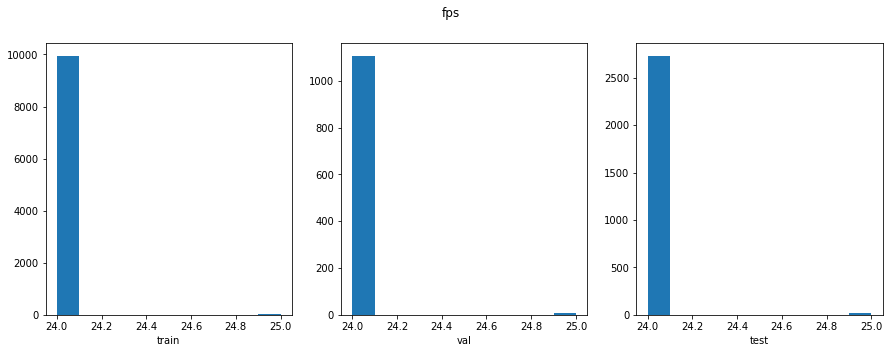

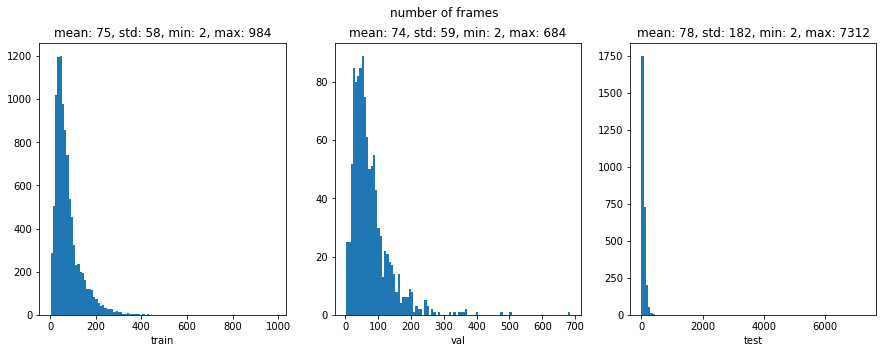

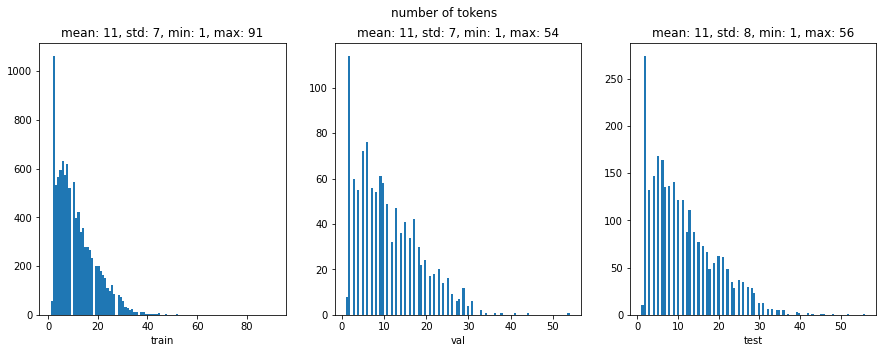

In [2]:
dbs = DatabaseStats(database='MELD')
fps_hist(dbs)
frames_hist(dbs)
tokens_hist(dbs)

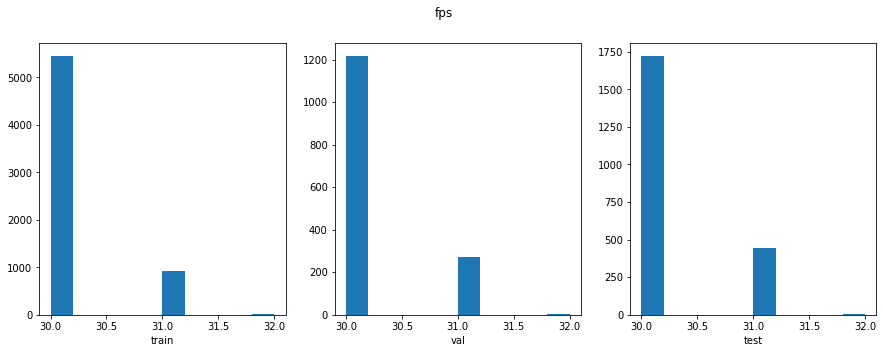

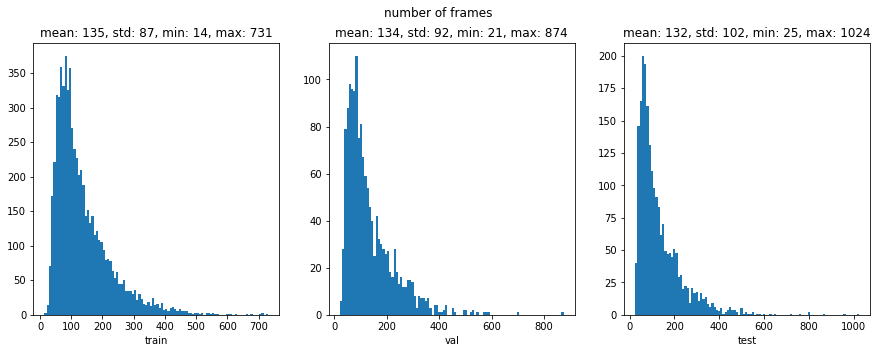

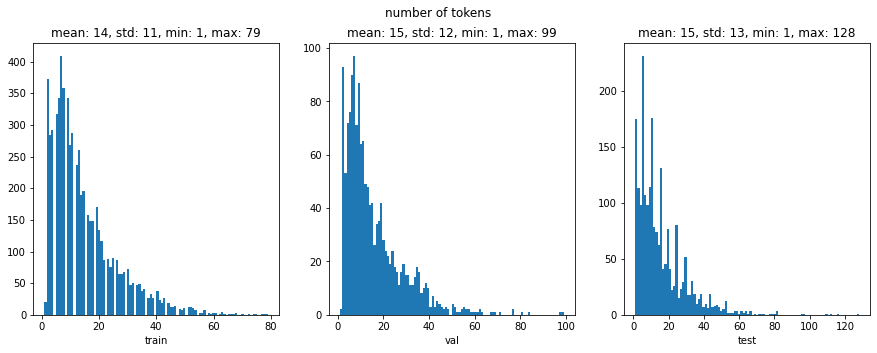

In [3]:
dbs = DatabaseStats(database='IEMOCAP')
fps_hist(dbs)
frames_hist(dbs)
tokens_hist(dbs)

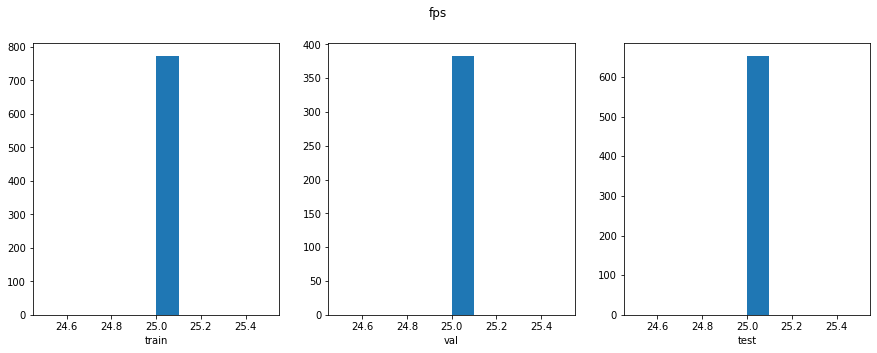

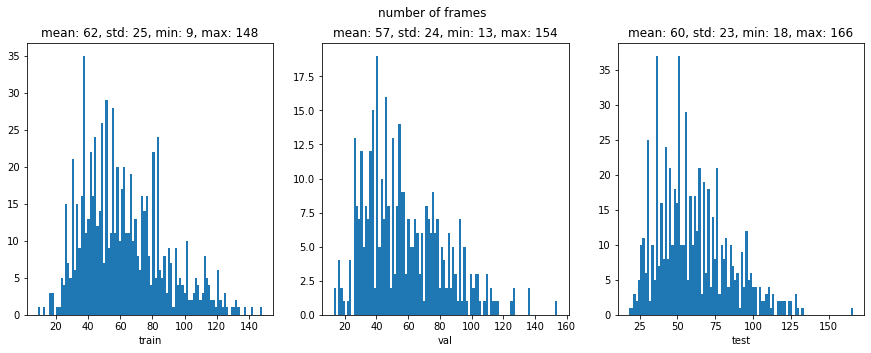

In [4]:
dbs = DatabaseStats(database='AFEW')
fps_hist(dbs)
frames_hist(dbs)

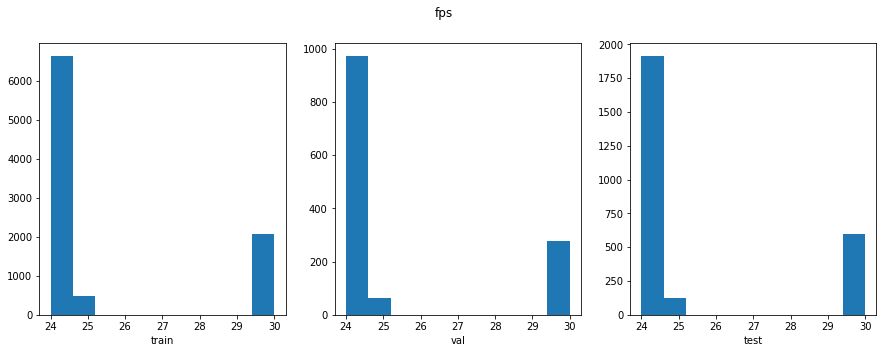

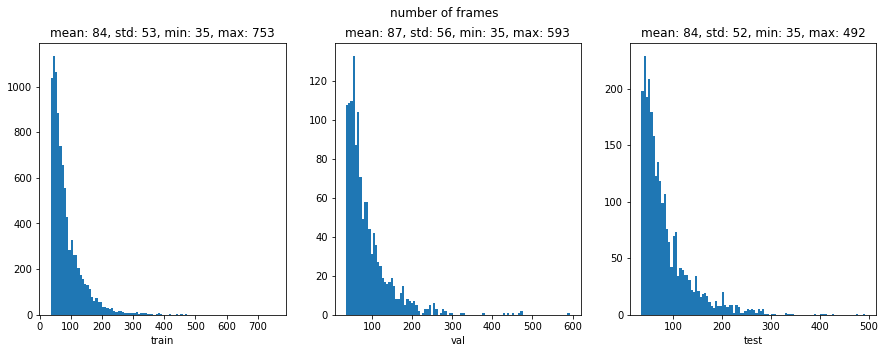

In [5]:
dbs = DatabaseStats(database='CAER')
fps_hist(dbs)
frames_hist(dbs)